In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/My Drive/data.zip'

## Loading the Files

Here we have applied some random transformations to the images like flipping about both axes and rotation

In [ ]:
gen=ImageDataGenerator(rescale=1/255,horizontal_flip=True,vertical_flip=True,rotation_range=10,fill_mode='nearest',validation_split=0.2)

NameError: ignored

In [ ]:
train=gen.flow_from_directory('train/images',color_mode='rgb',target_size=(200,200),batch_size=32,class_mode='categorical')


Found 1440 images belonging to 6 classes.


In [ ]:
val=gen.flow_from_directory('validation/images',color_mode='rgb',target_size=(200,200),batch_size=32,class_mode='categorical')

Found 360 images belonging to 6 classes.


In [ ]:
train.class_indices

{'crazing': 0,
 'inclusion': 1,
 'patches': 2,
 'pitted_surface': 3,
 'rolled-in_scale': 4,
 'scratches': 5}

## Simple CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

Here we have used a callback called early stopping which stops the model training once the validation loss has been minimized and restores the best weights at that epoch of least val loss

In [ ]:
early=EarlyStopping(monitor='val_loss',patience=5,mode='min',verbose=3,restore_best_weights=True)

### Model definition

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

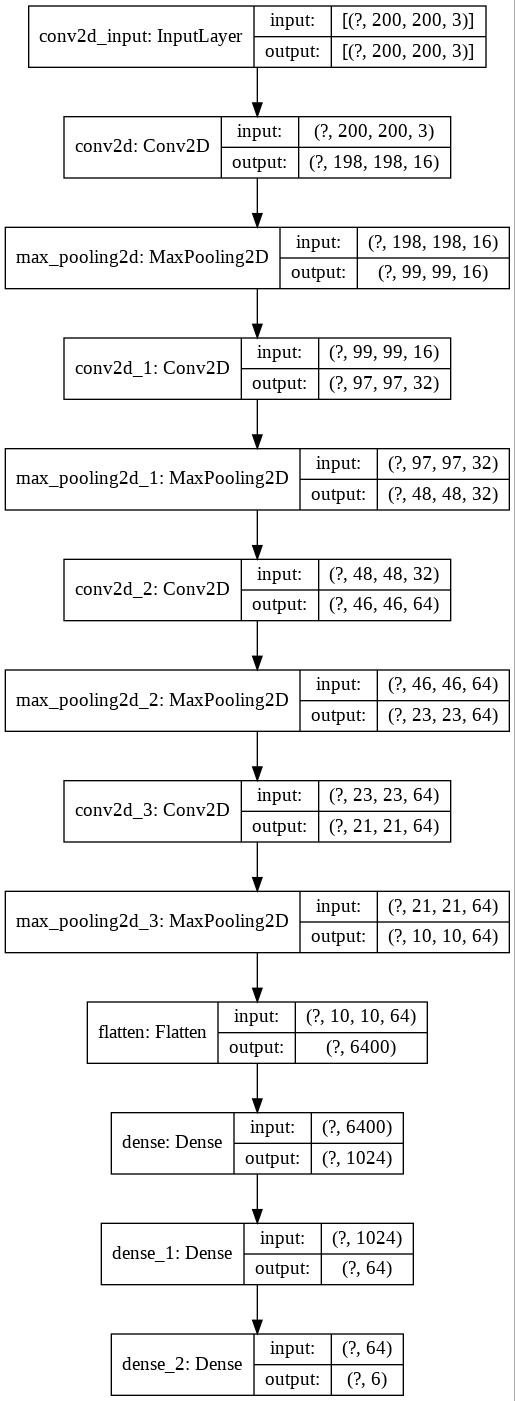

In [ ]:
plot_model(model,to_file='SimpleCNN.jpg',show_shapes=True)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_282 (Conv2D)          (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_283 (Conv2D)          (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_284 (Conv2D)          (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_285 (Conv2D)          (None, 21, 21, 64)       

### Model training

In [ ]:
model.fit(train,validation_data=val,epochs=100,callbacks=[early])

Epoch 1/100
45/45 [==============================] - 15s 328ms/step - loss: 1.7519 - accuracy: 0.2069 - val_loss: 1.7371 - val_accuracy: 0.2028
Epoch 2/100
45/45 [==============================] - 15s 323ms/step - loss: 1.3098 - accuracy: 0.4778 - val_loss: 1.2545 - val_accuracy: 0.5750
Epoch 3/100
45/45 [==============================] - 15s 322ms/step - loss: 0.6348 - accuracy: 0.7979 - val_loss: 0.5495 - val_accuracy: 0.8417
Epoch 4/100
45/45 [==============================] - 14s 321ms/step - loss: 0.2962 - accuracy: 0.9118 - val_loss: 0.3699 - val_accuracy: 0.8472
Epoch 5/100
45/45 [==============================] - 15s 324ms/step - loss: 0.3733 - accuracy: 0.8799 - val_loss: 0.5479 - val_accuracy: 0.7972
Epoch 6/100
45/45 [==============================] - 14s 322ms/step - loss: 0.2093 - accuracy: 0.9257 - val_loss: 0.4582 - val_accuracy: 0.8306
Epoch 7/100
45/45 [==============================] - 15s 324ms/step - loss: 0.3248 - accuracy: 0.8972 - val_loss: 0.4629 - val_accuracy:

In [ ]:
hist=model.history.history
fig = make_subplots(rows=1, cols=2,subplot_titles=("Train_Loss vs Val_Loss","Train_acc vs Val_Acc"))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['loss'],mode='lines+markers',name='Train_Loss'),row=1,col=1)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['val_loss'],mode='lines+markers',name='Val_Loss'),row=1,col=1)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['accuracy'],mode='lines+markers',name='Train_Accuracy'),row=1,col=2)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['val_accuracy'],mode='lines+markers',name='Val_Accuracy'),row=1,col=2)
fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.update_layout(title='Custom CNN')
fig.show()

In [ ]:
model.save('test_model1.h5')

## VGG 16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
VGG=VGG16(weights='imagenet',include_top=False,input_shape=(200,200,3))

### Model Definition

In [ ]:
model1=Sequential()
for layer in VGG.layers:
  layer.trainable=False
  model1.add(layer)
model1.add(Flatten())
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(6,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 50, 50, 256)      

### Model Training

In [ ]:
model1.fit(train,validation_data=val,epochs=100,callbacks=[early])

Epoch 1/100
45/45 [==============================] - 17s 383ms/step - loss: 0.8315 - accuracy: 0.7493 - val_loss: 0.2571 - val_accuracy: 0.9083
Epoch 2/100
45/45 [==============================] - 17s 369ms/step - loss: 0.1357 - accuracy: 0.9514 - val_loss: 0.1744 - val_accuracy: 0.9333
Epoch 3/100
45/45 [==============================] - 17s 368ms/step - loss: 0.1083 - accuracy: 0.9653 - val_loss: 0.1041 - val_accuracy: 0.9667
Epoch 4/100
45/45 [==============================] - 16s 365ms/step - loss: 0.0843 - accuracy: 0.9715 - val_loss: 0.1139 - val_accuracy: 0.9444
Epoch 5/100
45/45 [==============================] - 16s 363ms/step - loss: 0.0875 - accuracy: 0.9688 - val_loss: 0.2340 - val_accuracy: 0.9306
Epoch 6/100
45/45 [==============================] - 16s 364ms/step - loss: 0.0862 - accuracy: 0.9757 - val_loss: 0.1130 - val_accuracy: 0.9667
Epoch 7/100
45/45 [==============================] - 16s 367ms/step - loss: 0.0498 - accuracy: 0.9812 - val_loss: 0.0553 - val_accuracy:

In [ ]:
hist=model1.history.history
fig = make_subplots(rows=1, cols=2,subplot_titles=("Train_Loss vs Val_Loss","Train_acc vs Val_Acc"))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['loss'],mode='lines+markers',name='Train_Loss'),row=1,col=1)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['val_loss'],mode='lines+markers',name='Val_Loss'),row=1,col=1)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['accuracy'],mode='lines+markers',name='Train_Accuracy'),row=1,col=2)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['val_accuracy'],mode='lines+markers',name='Val_Accuracy'),row=1,col=2)
fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.update_layout(title='VGG16')
fig.show()

### Fine Tuning

In [ ]:
for layer in model1.layers:
  layer.trainable=True


In [ ]:
model1.fit(train,validation_data=val,epochs=100,callbacks=[early])

Epoch 1/100
45/45 [==============================] - 21s 458ms/step - loss: 0.0447 - accuracy: 0.9847 - val_loss: 0.1492 - val_accuracy: 0.9500
Epoch 2/100
45/45 [==============================] - 20s 450ms/step - loss: 0.0450 - accuracy: 0.9847 - val_loss: 0.1849 - val_accuracy: 0.9444
Epoch 3/100
45/45 [==============================] - 20s 449ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0440 - val_accuracy: 0.9806
Epoch 4/100
45/45 [==============================] - 20s 448ms/step - loss: 0.0087 - accuracy: 0.9965 - val_loss: 0.0433 - val_accuracy: 0.9833
Epoch 5/100
45/45 [==============================] - 20s 452ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0214 - val_accuracy: 0.9917
Epoch 6/100
45/45 [==============================] - 20s 446ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0948 - val_accuracy: 0.9833
Epoch 7/100
45/45 [==============================] - 20s 451ms/step - loss: 0.0447 - accuracy: 0.9840 - val_loss: 0.0771 - val_accuracy:

In [ ]:
model1.evaluate_generator(val)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.020279884338378906, 0.9916666746139526]

In [ ]:
model1.save('Finalmodel.h5')

## InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

### Model Definition

In [ ]:
mod=InceptionV3(weights='imagenet',include_top=False)
x=mod.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
out=Dense(6,activation='softmax')(x)
inception=Model(inputs=mod.input,outputs=out)
for layer in mod.layers:
  layer.trainable=False
inception.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Model Training

In [ ]:
inception.fit(train,validation_data=val,epochs=100,callbacks=[early])

Epoch 1/100
45/45 [==============================] - 17s 381ms/step - loss: 0.4902 - accuracy: 0.8639 - val_loss: 0.2069 - val_accuracy: 0.9306
Epoch 2/100
45/45 [==============================] - 16s 353ms/step - loss: 0.0605 - accuracy: 0.9833 - val_loss: 0.1190 - val_accuracy: 0.9583
Epoch 3/100
45/45 [==============================] - 16s 349ms/step - loss: 0.0530 - accuracy: 0.9854 - val_loss: 0.3354 - val_accuracy: 0.9000
Epoch 4/100
45/45 [==============================] - 16s 350ms/step - loss: 0.0424 - accuracy: 0.9826 - val_loss: 0.1751 - val_accuracy: 0.9417
Epoch 5/100
45/45 [==============================] - 16s 348ms/step - loss: 0.0342 - accuracy: 0.9910 - val_loss: 0.2524 - val_accuracy: 0.9222
Epoch 6/100
45/45 [==============================] - 16s 354ms/step - loss: 0.0394 - accuracy: 0.9861 - val_loss: 0.1372 - val_accuracy: 0.9417
Epoch 7/100
45/45 [==============================] - 16s 354ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.1842 - val_accuracy:

In [ ]:
hist=inception.history.history

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2,subplot_titles=("Train_Loss vs Val_Loss","Train_acc vs Val_Acc"))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['loss'],mode='lines+markers',name='Train_Loss'),row=1,col=1)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['val_loss'],mode='lines+markers',name='Val_Loss'),row=1,col=1)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['accuracy'],mode='lines+markers',name='Train_Accuracy'),row=1,col=2)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['val_accuracy'],mode='lines+markers',name='Val_Accuracy'),row=1,col=2)
fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.show()

### Fine Tuning

In [ ]:
for layer in inception.layers[:249]:
   layer.trainable = False
for layer in inception.layers[249:]:
   layer.trainable = True

In [ ]:
from tensorflow.keras.optimizers import Adam
inception.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
inception.fit(train,validation_data=val,epochs=100,callbacks=[early])

Epoch 1/100
45/45 [==============================] - 17s 382ms/step - loss: 0.1620 - accuracy: 0.9431 - val_loss: 0.3281 - val_accuracy: 0.9278
Epoch 2/100
45/45 [==============================] - 16s 357ms/step - loss: 0.0401 - accuracy: 0.9854 - val_loss: 0.1591 - val_accuracy: 0.9500
Epoch 3/100
45/45 [==============================] - 16s 355ms/step - loss: 0.0426 - accuracy: 0.9861 - val_loss: 0.1361 - val_accuracy: 0.9528
Epoch 4/100
45/45 [==============================] - 16s 356ms/step - loss: 0.0183 - accuracy: 0.9951 - val_loss: 0.0878 - val_accuracy: 0.9611
Epoch 5/100
45/45 [==============================] - 16s 354ms/step - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.1055 - val_accuracy: 0.9667
Epoch 6/100
45/45 [==============================] - 16s 354ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0690 - val_accuracy: 0.9778
Epoch 7/100
45/45 [==============================] - 16s 356ms/step - loss: 0.0107 - accuracy: 0.9958 - val_loss: 0.0566 - val_accuracy:

In [ ]:
inception.save('Inception.h5')

## MobileNetV2

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

### Model Definition

In [ ]:
mod=MobileNetV2(weights='imagenet',include_top=False)
x=mod.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
out=Dense(6,activation='softmax')(x)
mobile=Model(inputs=mod.input,outputs=out)
for layer in mod.layers:
  layer.trainable=False
mobile.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Model training

In [ ]:
mobile.fit(train,validation_data=val,epochs=100,callbacks=[early])

Epoch 1/100
45/45 [==============================] - 16s 347ms/step - loss: 0.2079 - accuracy: 0.9181 - val_loss: 0.0561 - val_accuracy: 0.9806
Epoch 2/100
45/45 [==============================] - 15s 330ms/step - loss: 0.0119 - accuracy: 0.9979 - val_loss: 0.0413 - val_accuracy: 0.9889
Epoch 3/100
45/45 [==============================] - 15s 328ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0443 - val_accuracy: 0.9833
Epoch 4/100
45/45 [==============================] - 15s 331ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.0821 - val_accuracy: 0.9806
Epoch 5/100
45/45 [==============================] - 15s 330ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0065 - val_accuracy: 0.9972
Epoch 6/100
45/45 [==============================] - 15s 329ms/step - loss: 0.0200 - accuracy: 0.9910 - val_loss: 0.1665 - val_accuracy: 0.9694
Epoch 7/100
45/45 [==============================] - 15s 327ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0177 - val_accuracy:

In [ ]:
mobile.save('mobile.h5')

In [ ]:
hist=mobile.history.history

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2,subplot_titles=("Train_Loss vs Val_Loss","Train_acc vs Val_Acc"))
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['loss'],mode='lines+markers',name='Train_Loss'),row=1,col=1)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['val_loss'],mode='lines+markers',name='Val_Loss'),row=1,col=1)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['accuracy'],mode='lines+markers',name='Train_Accuracy'),row=1,col=2)
fig.add_trace(go.Scatter(x=[1,2,3,4,5,6,7],y=hist['val_accuracy'],mode='lines+markers',name='Val_Accuracy'),row=1,col=2)
fig.update_xaxes(title_text="Epochs", row=1, col=1)
fig.update_xaxes(title_text="Epochs", row=1, col=2)
fig.update_layout(title='MobileNetV2')
fig.show()

## Model Comparison

In [ ]:
fig=go.Figure()
fig.add_trace(go.Bar(x=['Custom CNN','VGG16','Inception V3','MobileNet V2'],y=[96.18,98.82,98.33,99.79],name='Training Accuracy'))
fig.add_trace(go.Bar(x=['Custom CNN','VGG16','Inception V3','MobileNet V2'],y=[92.22,98.61,95.83,99.72],name='Validation Accuracy'))
fig.update_yaxes(title_text='Accuracy',range=[90,100])
fig.update_xaxes(title_text='Models')
fig.update_layout(title='Accuracy Comparison of different architectures',barmode='group')
fig.show()

# Thank You   !!!!!!